# Getting python for science up and running
Before we can use python we have to install python and get everything ready to go. This means:

1. download and install anaconda
2. download pymap
3. create a virtual environment with the correct requirements
4. test this virtual environment

# 1. Downloading and installing Anaconda

You can find the anaconda download page at:

https://www.continuum.io/downloads

More complete instructions can be found at the [Anaconda Homepage](http://docs.continuum.io/anaconda) but if you have any troubles please don't hesitate ask for help from the pymap team.

Once the file is downloaded run the following command from the a terminal if you are using Linux:

In [ ]:
$ bash Anaconda-2.x.x-Linux-x86[_64].sh

After accepting the license terms, you will be asked to specify the install location (which defaults to ~/anaconda).

Note: You do NOT need root privileges to install Anaconda, if you select a user writable install location, such as ~/anaconda.* After the self extraction is finished, you should add the anaconda binary directory to your PATH environment variable.

As all of Anaconda is contained in a single directory, uninstalling Anaconda is easy (you simply remove the entire install location directory).

If you are using windows/Mac use the provided installer.

# 3. Create a virtual environment with the correct requirements

Anaconda gives us greater control over python virtual environments. You can find a complete walkthrough [here](http://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/) for creating virtual environments with anaconda. To create a new environment using the requirements for making maps and doing seismological explorations we will start by doing the following:

In [ ]:
$ conda update conda

In [ ]:
$ conda create -n hazard python=3.5 anaconda

In [ ]:
$ conda install basemap

In [ ]:
$ conda install shapely

This creates an environment and includes all of the libraries available to anaconda. This is important because we want to include `numpy`, `scipy`, `Basemap`, `geopy`, `shapely` and `pandas` without having to compile them ourselves.

# 4. Test the virtual environment

First, create a folder called "hazard" on your desktop and then navigate there through the terminal. This is where you can store all the python scripts and jupyter notebooks you create.

Once this command has finished the `hazard` environment needs to be activated. It is important to always activate the environment before you try to use pymap so that all of the requirements for pymap are met.

To activate the environment type:

In [ ]:
$ source activate hazard

or if you are in windows:

In [ ]:
c:\> activate hazard

You should see something like:
    
linux:
    `(hazard)you@your-computer:~/hazard$`
    
windows:
    `(hazard)c:\hazard\>`

We will use [jupyter notebooks](http://jupyter.org/) for all of our pymapping. To test, first make sure you are in the root directory of pymap, then open a terminal and type:

In [ ]:
$ jupyter notebook

This will open a browser with a file navigation. Click on examples and click New and select Python:

<img src="new.png" width="750">

This opens a new browser window and at the top you will see a box that you can type into. Copy and paste the below code:

In [2]:
# if you are in the examples directory you need this code.
# if you are in the root directory please delete.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm

This should run and you should get no output. If you have an error it is most likely due to not setting up the environment correctly.

If everything works lets make our first map!

Normally, we don't condone copying and pasting code, but to get you started copy and paste the below cells into your newly created jupyter notebook.

You can run them by clicking the run cell button that looks like >|, or by pressing `ctrl + enter`.

The output should be like below. Please note the comments inline.

In [4]:
# this line is what is called "ipython magic". It allows
# inline matplotlib plots which makes for quick prototyping
# of maps, graphs, and other visuals.
%matplotlib inline

# Pandas and numpy is our main data storage library and allows us to
# manipulate our data in many ways
import pandas as pd
import numpy as np

# matplotlib allows us to create plots
import matplotlib.pyplot as plt

# basemap allows us to create maps, cm allows manipulation of color maps
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm

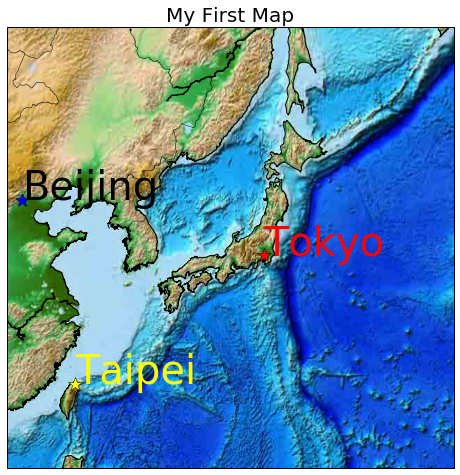

In [6]:
# Here we create the ax object. It is important to do this because 
# it allows us many basic ways to manipulate the image through the 
# Axes methods
fig, ax = plt.subplots(1, figsize=(8,8))

# Here we create the Basemap object. It is important to NOT NOT NOT
# name this object "map". This is because map is a built-in function
# in python and you will no longer be able to use it if you call this
# object map.
m = Basemap(projection='merc',
        llcrnrlat=17.5
        , urcrnrlat=51.5
        , llcrnrlon=115.0
        , urcrnrlon=158.0
        , resolution='i', area_thresh=10000
        , ax=ax)

# Here we draw some features on the map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents(color='gray', lake_color='white', zorder=0)
m.drawmapboundary(fill_color='red')
m.etopo()

# This allows us to set a title for the map. We can use many methods
# from the ax object to produce labels, annotations, etc.
ax.set_title('My First Map', fontsize=20)

# For this toy example we will just plot the locations of two cities:
# Tokyo and Taipei. To do this first we need to know the longitude
# and latitude of these cities.
tokyo = [139.6917, 35.6895]

# Now we convert the longitude and latitude of Tokyo into the cartesian
# coordinates of the plot. This is important and if you don't do this
# you will not plot correctly.
x, y = m(tokyo[0], tokyo[1])

m.plot(x, y, '*', color='red', markersize=15)

# Note again, the power of the Axes object.
ax.annotate('Tokyo', xy=(x+1000, y), color='red', fontsize=40)


# We repeat what we did for Tokyo for Taipei
taipei = [121.5654, 25.0330]
x, y = m(taipei[0], taipei[1])

m.plot(x, y, '*', color='yellow', markersize=15)
ax.annotate('Taipei', xy=(x+1000, y), color='yellow', fontsize=40)

# We repeat what we did for Tokyo for Taipei
beijing = [116.4074, 39.9042]
x, y = m(beijing[0], beijing[1])

m.plot(x, y, '*', color='blue', markersize=15)
ax.annotate('Beijing', xy=(x+1000, y), color='black', fontsize=40)

And now you are done! Next we will spend some time learning about python data types and manipulations.